# Classify audio effects on guitar samples

## 1. Import and config

In [52]:
import os
import time
import numpy as np
import pandas as pd
import scipy
import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as ms
ms.use('seaborn-muted')
import IPython.display as Ipd
import sklearn

## 2. Import and prepare data

In [19]:
#get audio files
fileswchorus = os.listdir('./DataSet/Samples/Chorus')
fileswdistortion = os.listdir('./DataSet/Samples/Distortion')
filesweq = os.listdir('./DataSet/Samples/EQ')
fileswdelay = os.listdir('./DataSet/Samples/FeedbackDelay')
fileswflanger = os.listdir('./DataSet/Samples/Flanger')
fileswnofx = os.listdir('./DataSet/Samples/NoFX')

#calc number of samples
n_data = len(fileswchorus)+len(fileswdistortion)+len(filesweq)+len(fileswdelay)+len(fileswflanger)+len(fileswnofx)
print("Number of samples: %i" % n_data)

#setup classes
labels = np.zeros(n_data)
feature_len = 1131
features = np.zeros((n_data, feature_len))
classes = ['Chorus','Distortion','EQ','FeedbackDelay','Flanger','NoFX']

Number of samples: 9360


In [56]:
from IPython.display import clear_output
start_time = time.time()
count = 0

samplerate = 22050

def extract_features(filename, count=0):
    signal, dummy = librosa.load(filename, samplerate, mono=True)
    output = librosa.feature.mfcc(signal, samplerate, n_mfcc=13).flatten()
    clear_output(wait=True)
    print("%i/%i samples processed" % (count, n_data))
    return output
    
idx = 0
    
for x in fileswchorus:
    count = count+1
    output = extract_features('./DataSet/Samples/Chorus/' + x, count)
    features[idx,:] = output
    labels[idx] = 0
    idx = idx+1
    
for x in fileswdistortion:
    count = count+1
    output = extract_features('./DataSet/Samples/Distortion/' + x, count)
    features[idx,:] = output
    labels[idx] = 1
    idx = idx+1    
        
for x in filesweq:
    count = count+1
    output = extract_features('./DataSet/Samples/EQ/' + x, count)
    features[idx,:] = output
    labels[idx] = 2
    idx = idx+1    
    
for x in fileswdelay:
    count = count+1
    output = extract_features('./DataSet/Samples/FeedbackDelay/' + x, count)
    features[idx,:] = output
    labels[idx] = 3
    idx = idx+1    

for x in fileswflanger:
    count = count+1
    output = extract_features('./DataSet/Samples/Flanger/' + x, count)
    features[idx,:] = output
    labels[idx] = 4
    idx = idx+1    

for x in fileswnofx:
    count = count+1
    output = extract_features('./DataSet/Samples/NoFX/' + x, count)
    features[idx,:] = output
    labels[idx] = 5
    idx = idx+1    

print("Feature extraction done")
print("Took %d seconds" % (time.time() - start_time))

9360/9360 samples processed
Feature extraction done
Took 894 seconds


In [57]:
labels = pd.DataFrame(labels)
labels.columns = ['labels']
labels = labels['labels']

In [58]:
dataset = pd.DataFrame(features)
column_names = []
for c in range(feature_len):
    column_names.append("MFCC %i" % c)
dataset.columns =  column_names
dataset['label digit'] = labels
label_text = []
for l in labels:
    label_text.append(classes[int(l)])
dataset['label text'] = label_text
dataset.to_csv('features.csv')
dataset

,MFCC 0,MFCC 1,MFCC 2,MFCC 3,MFCC 4,MFCC 5,MFCC 6,MFCC 7,MFCC 8,MFCC 9,...,MFCC 1123,MFCC 1124,MFCC 1125,MFCC 1126,MFCC 1127,MFCC 1128,MFCC 1129,MFCC 1130,label digit,label text
0,-784.702332,-784.702332,-784.702332,-783.191589,-780.561096,-780.741699,-779.379578,-780.059937,-780.545044,-779.264648,...,-9.980167,-9.575130,-11.077902,-10.313608,-9.547455,-8.738467,-9.587674,-6.503112,0.0,Chorus
1,-761.046631,-761.046631,-761.046631,-760.790771,-758.623718,-758.156921,-756.930786,-757.317566,-757.418396,-756.323364,...,-11.614445,-10.615732,-10.760288,-10.884594,-8.935947,-10.373097,-10.659937,-7.882442,0.0,Chorus
2,-755.930176,-755.930176,-755.930176,-755.882141,-755.104919,-753.960022,-752.564697,-752.798523,-752.437561,-752.191284,...,-9.644500,-5.715909,-3.048868,-2.390507,-0.943978,-2.096196,-3.543271,-2.525408,0.0,Chorus
3,-775.834900,-775.834900,-775.834900,-775.834900,-775.834900,-771.108582,-766.405090,-763.087646,-762.393433,-763.058472,...,-5.656474,-5.338775,-5.956665,-6.357946,-5.982137,-5.842979,-4.504141,-2.002567,0.0,Chorus
4,-745.423096,-745.423096,-745.423096,-745.423096,-745.423096,-743.130554,-740.174133,-737.529724,-736.178650,-735.844055,...,-6.135539,-7.253042,-7.990482,-7.548039,-7.059709,-6.347627,-4.458066,-1.742748,0.0,Chorus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,...,17.676605,18.026758,18.565594,17.836399,16.837769,15.430471,12.818876,10.243579,5.0,NoFX
9356,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,...,26.542507,25.427277,23.974236,21.803810,19.794647,17.421839,14.595476,12.041006,5.0,NoFX
9357,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,...,25.770664,24.639793,23.246094,21.348425,19.865543,17.576389,14.275450,10.246469,5.0,NoFX
9358,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,...,20.394966,18.981857,18.081066,16.769773,15.511858,13.729324,10.692130,7.975833,5.0,NoFX


In [59]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.2, random_state=6)

In [60]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

## SVM Classifier 

In [18]:
#Creating an instance of a SVM classifier
#model_SVM = sklearn.svm.SVC(kernel='rbf', C=2.0, verbose=True)

#training the model
#model_SVM.fit(feat_train, lab_train)

#applying the the model on the test data (features)
#lab_predict = model_SVM.predict(feat_test)

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
#print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
#print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

[LibSVM]

KeyboardInterrupt: 

In [ ]:
#computing a comprehensive set of performance metrics
#print(sklearn.metrics.classification_report(lab_test, lab_predict))

#disp = sklearn.metrics.plot_confusion_matrix(model_, feat_test, lab_test, display_labels=classes, cmap=plt.cm.Blues, normalize=None)

## ANN Classifier

In [61]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

##Creating an instance of a MLP classifier
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=10000, activation='relu', verbose=False)

#train the model
mlp.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = mlp.predict(feat_test)
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

Accuracy: 0.9107905982905983


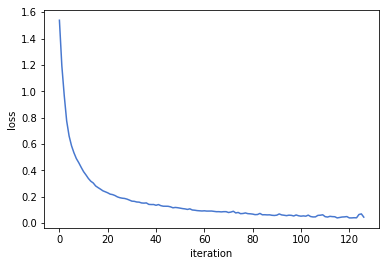

Number of mislabeled samples 167 out of 1872
Accuracy: 0.9107905982905983
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83       407
         1.0       1.00      1.00      1.00       356
         2.0       0.89      0.89      0.89       256
         3.0       0.99      0.99      0.99       368
         4.0       0.86      0.85      0.85       369
         5.0       0.90      0.91      0.91       116

    accuracy                           0.91      1872
   macro avg       0.91      0.91      0.91      1872
weighted avg       0.91      0.91      0.91      1872



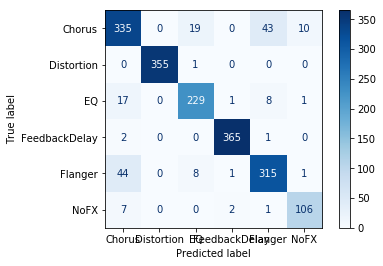

In [62]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))
disp = sklearn.metrics.plot_confusion_matrix(mlp, feat_test, lab_test, display_labels=classes, cmap=plt.cm.Blues, normalize=None)

In [63]:
#displaying names of misclassified files
results = lab_test == lab_predict

for index, value in results.items():
    if value == False:
        print(classes[int(lab_test[index])])

EQ
Flanger
Flanger
Chorus
Chorus
Chorus
Chorus
EQ
FeedbackDelay
Chorus
Chorus
Chorus
Chorus
Flanger
NoFX
FeedbackDelay
EQ
Chorus
NoFX
Flanger
Flanger
Flanger
Flanger
Flanger
Flanger
Chorus
Flanger
Chorus
Flanger
Chorus
Flanger
EQ
Chorus
Flanger
Flanger
NoFX
EQ
Chorus
EQ
Flanger
Chorus
Flanger
Chorus
FeedbackDelay
EQ
EQ
Flanger
EQ
Chorus
Chorus
Flanger
Chorus
Flanger
Chorus
Chorus
Chorus
Chorus
Flanger
Chorus
Flanger
NoFX
Chorus
Chorus
NoFX
EQ
Chorus
Flanger
EQ
Chorus
Flanger
Flanger
Chorus
EQ
Chorus
Chorus
Chorus
Chorus
Flanger
Chorus
Chorus
EQ
Flanger
EQ
Flanger
Chorus
NoFX
EQ
Chorus
Chorus
Flanger
Flanger
Chorus
Chorus
Chorus
Chorus
EQ
Chorus
Chorus
Chorus
EQ
NoFX
Flanger
Flanger
NoFX
Chorus
Chorus
EQ
Flanger
EQ
Chorus
Flanger
EQ
Chorus
Chorus
Chorus
Flanger
NoFX
EQ
Chorus
Flanger
EQ
Chorus
Flanger
Chorus
Flanger
EQ
Chorus
Chorus
Chorus
Chorus
Flanger
EQ
Flanger
Flanger
Flanger
Flanger
Chorus
Flanger
Flanger
Flanger
Flanger
NoFX
EQ
Chorus
Chorus
Chorus
Flanger
Chorus
Chorus
Flanger
F

# K-Fold Cross Validation

In [64]:
# Creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                                  ('classifier', MLPClassifier(hidden_layer_sizes=(10,5), max_iter=10000, activation='relu', verbose=False))
                                 ])

In [65]:
skf = sklearn.model_selection.StratifiedKFold()
scores = sklearn.model_selection.cross_validate(pipe, features, labels, cv=skf, scoring=('f1_macro', 'accuracy'), return_train_score=True)

print(scores,'\n')
print('Accuracy mean and variance', np.mean(scores['test_accuracy']),np.var(scores['test_accuracy']),'\n')
print('F1 macro mean and variance', np.mean(scores['test_f1_macro']),np.var(scores['test_f1_macro']),'\n')

{'fit_time': array([22.10571456, 15.5191443 , 16.79056835, 13.17702556, 16.16677308]), 'score_time': array([0.02294087, 0.02197361, 0.02297497, 0.02792525, 0.02290654]), 'test_f1_macro': array([0.81466266, 0.8499525 , 0.86248155, 0.79835395, 0.76599578]), 'train_f1_macro': array([0.99855266, 0.99813533, 0.99265651, 0.98802057, 0.98771438]), 'test_accuracy': array([0.82852564, 0.86538462, 0.86271368, 0.80982906, 0.77350427]), 'train_accuracy': array([0.99826389, 0.99786325, 0.99225427, 0.98637821, 0.98571047])} 

Accuracy mean and variance 0.8279914529914529 0.0011805783841040255 

F1 micro mean and variance 0.8182892849631151 0.0012201391383112972 

